In [156]:
# Importing Required Libraries

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('train.csv')

data.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [157]:
# Shape of the training data

print(data.shape)

(1460, 81)


### Pre-Processing

In [158]:
# Handling Missing values

print("Percentage of Null values in each column: ")
for col in data.columns:
    if data[col].isna().sum() > 0:
        print(col, data[col].isna().sum()/len(data[col])*100)

Percentage of Null values in each column: 
LotFrontage 17.73972602739726
Alley 93.76712328767123
MasVnrType 0.547945205479452
MasVnrArea 0.547945205479452
BsmtQual 2.5342465753424657
BsmtCond 2.5342465753424657
BsmtExposure 2.6027397260273974
BsmtFinType1 2.5342465753424657
BsmtFinType2 2.6027397260273974
Electrical 0.0684931506849315
FireplaceQu 47.26027397260274
GarageType 5.5479452054794525
GarageYrBlt 5.5479452054794525
GarageFinish 5.5479452054794525
GarageQual 5.5479452054794525
GarageCond 5.5479452054794525
PoolQC 99.52054794520548
Fence 80.75342465753424
MiscFeature 96.30136986301369


### Finding the relationship between missing values and Sales Price

In [159]:
def relationship(col):

    dataset = data.copy()

    dataset[col] = dataset['LotFrontage'].isna().astype(int)

    dataset.groupby(col)['SalePrice'].median().plot.bar()

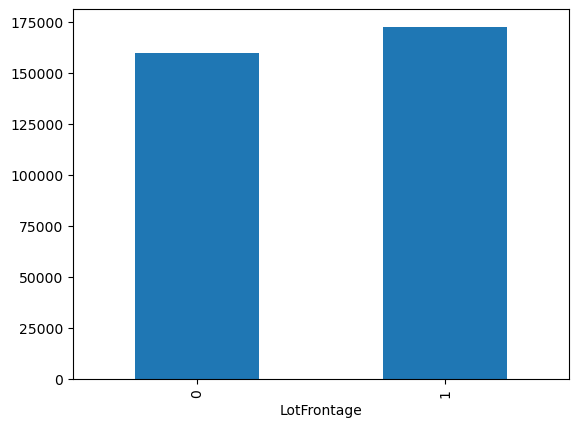

In [160]:
relationship('LotFrontage')

<p>Here we can see the relationship between each column and sales prices. we can replace all the null values from the respected columns with some meaning ful data we will do that in Feature Engineering</p>

In [161]:
# Id column is not required

data.drop('Id', axis=1, inplace=True)

In [162]:
# Data that not contains any objects
numerical_data = data.select_dtypes(exclude='object')
numerical_data.head(1)

len(numerical_data.columns)

37

out of 81 columns from the data there are 37 columns which are numerical

### Let's see the relationship between Year and Sales Price

Text(0.5, 1.0, 'House Price vs Year Sold')

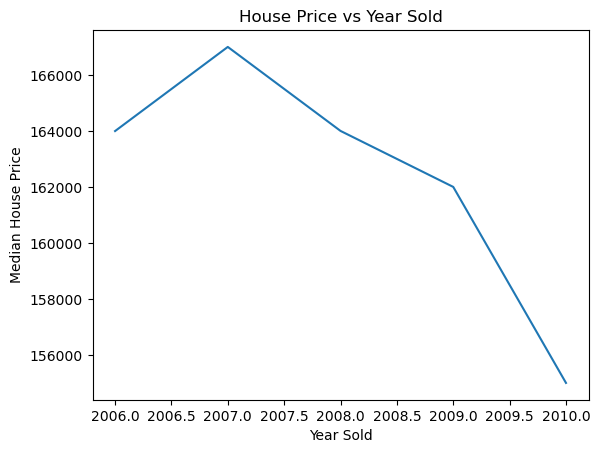

In [164]:
data.groupby('YrSold')['SalePrice'].median().plot()

plt.xlabel('Year Sold')
plt.ylabel('Median House Price')

plt.title('House Price vs Year Sold')

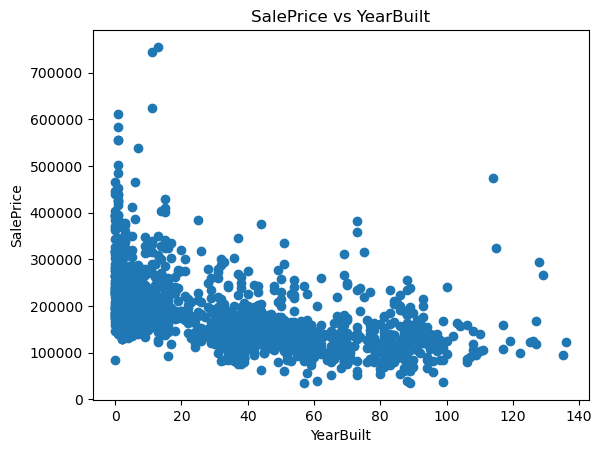

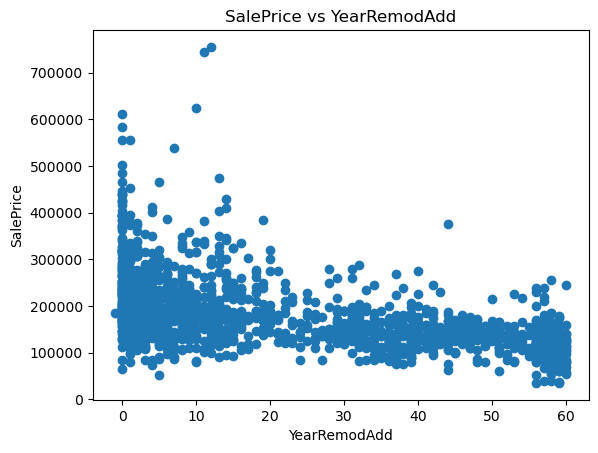

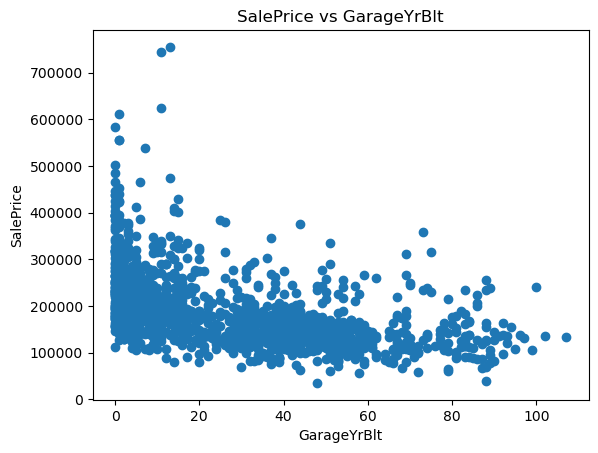

In [168]:
yearList = ['YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

for year in yearList:
    dataset = data.copy()

    if year != 'YrSold':
        dataset[year] = dataset['YrSold'] - dataset[year]
        plt.scatter(dataset[year], data['SalePrice'])
        plt.xlabel(year)
        plt.ylabel('SalePrice')
        plt.title('SalePrice vs '+year)
        plt.show()

From the above image the more the years the less the sales price, incase of the remodification the more years more house has been gone for remodificaton we can see it from salesprice vs yearremodadd

In [173]:
descrete_col = [col for col in numerical_data.columns if len(data[col].unique()) < 25 and col not in yearList]

print(descrete_col)
print("length of the descrete columns: ", len(descrete_col))

['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']
length of the descrete columns:  17


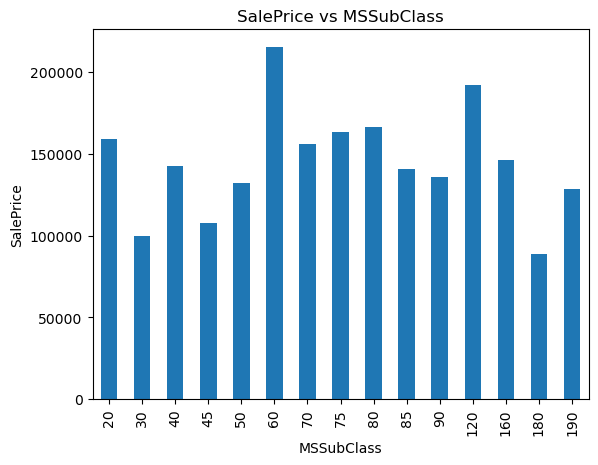

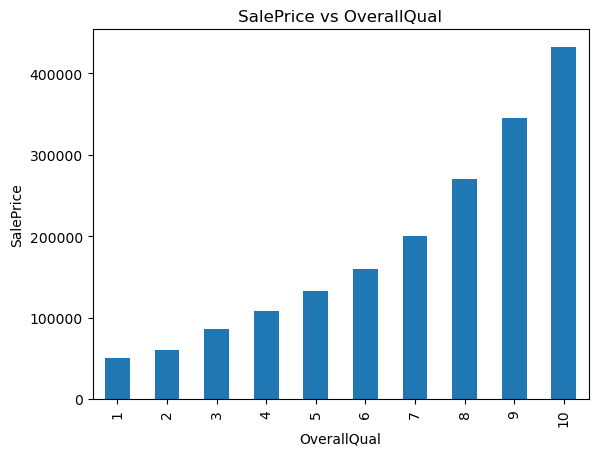

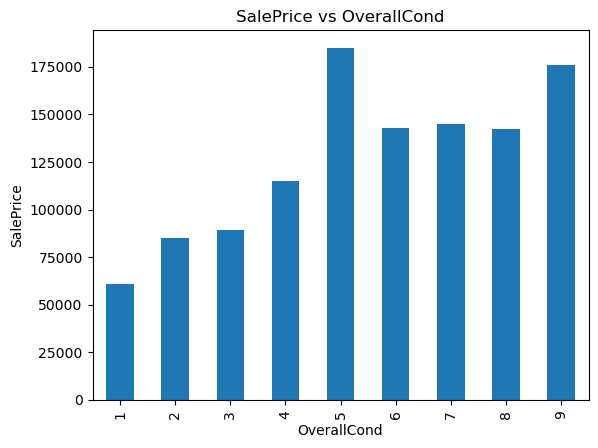

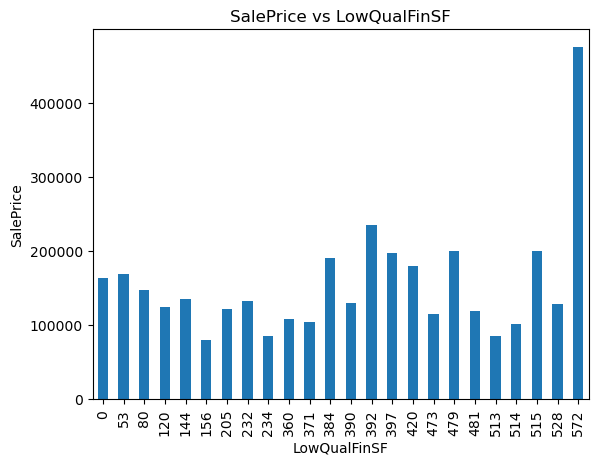

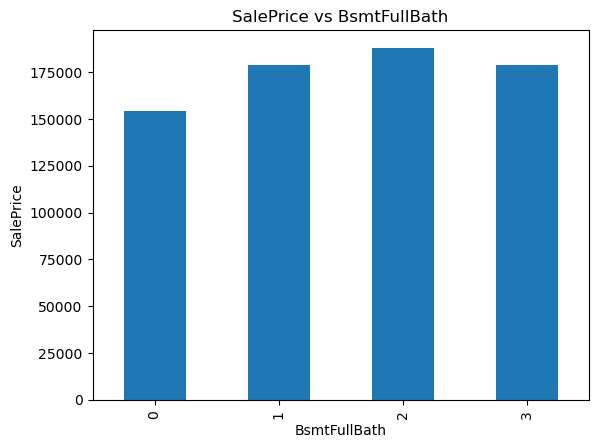

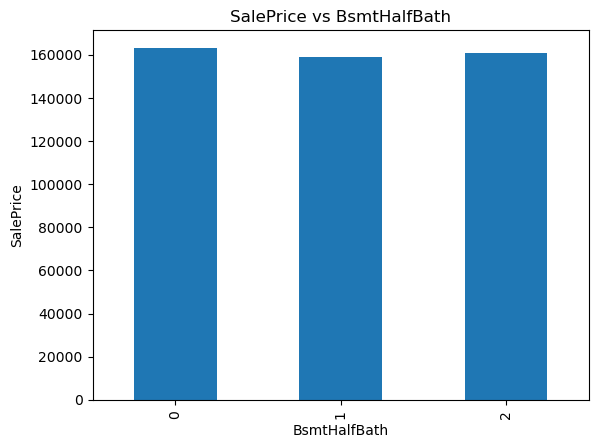

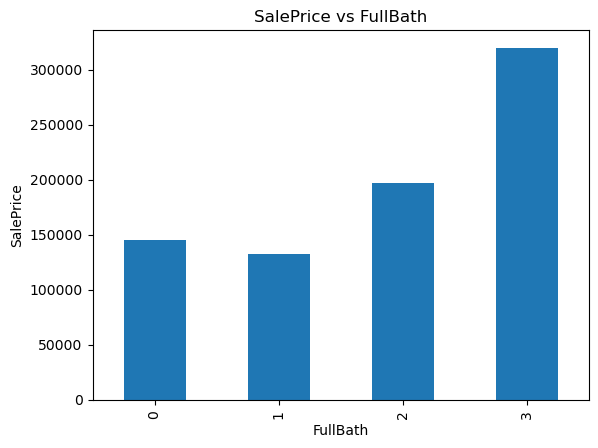

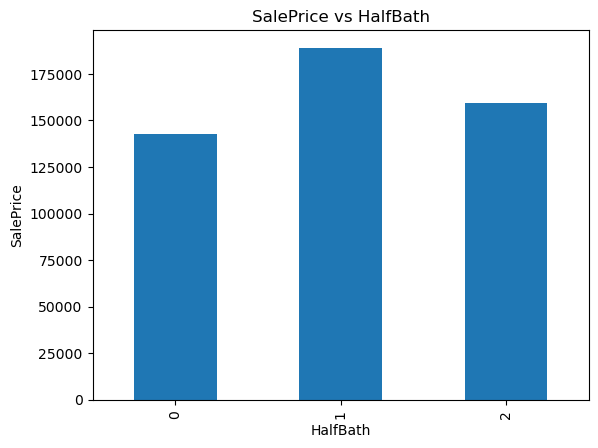

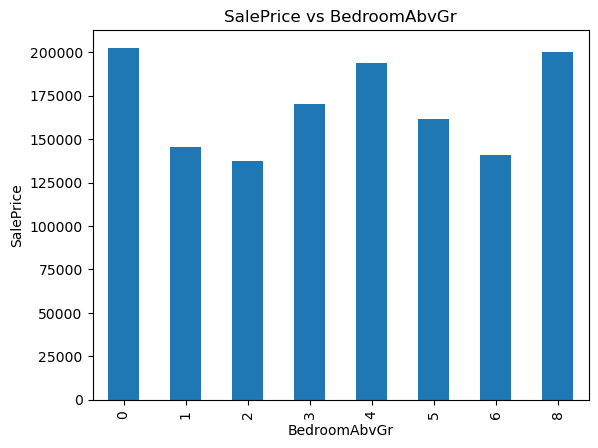

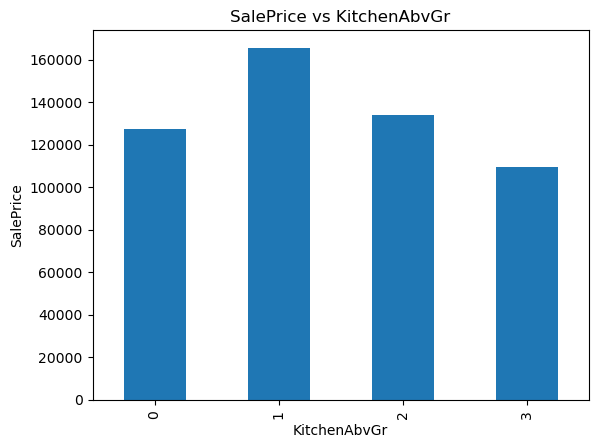

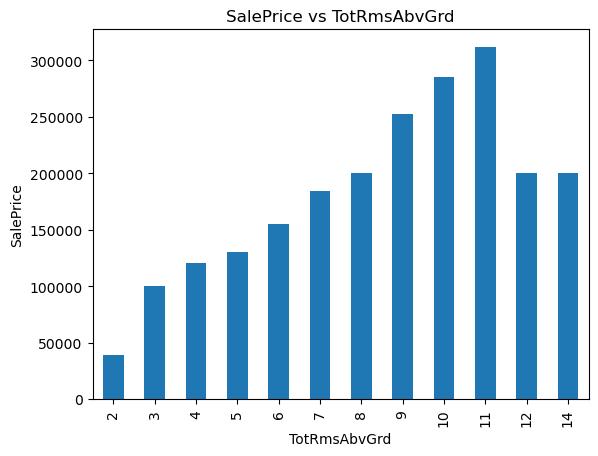

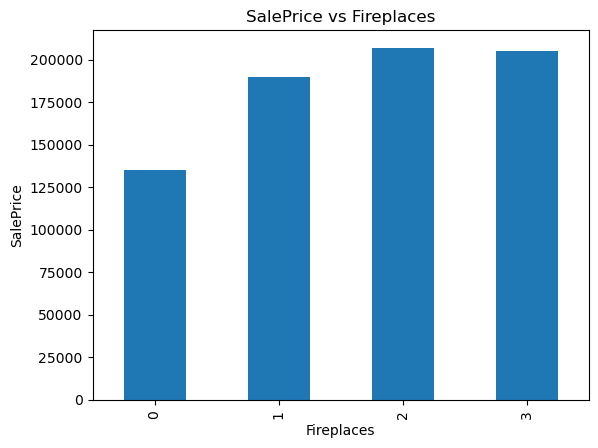

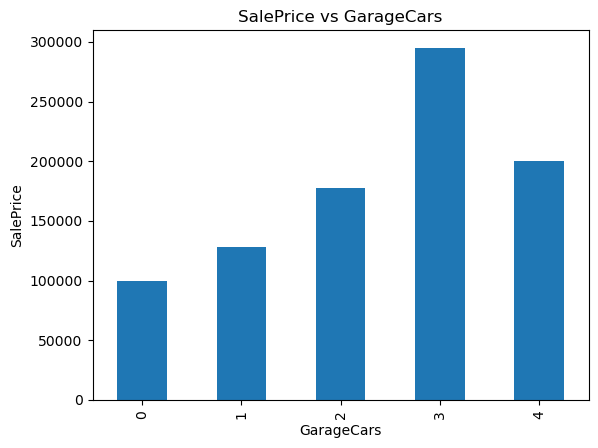

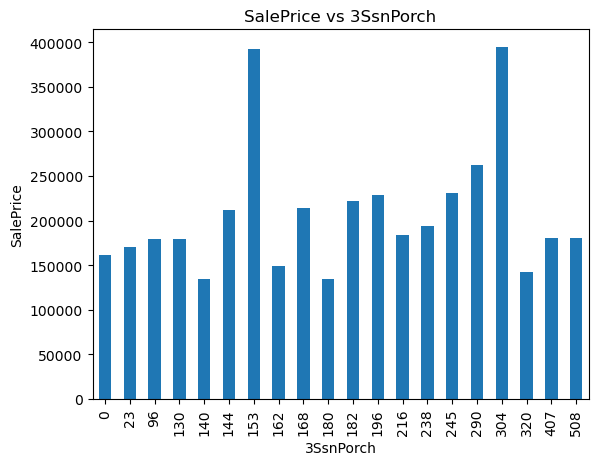

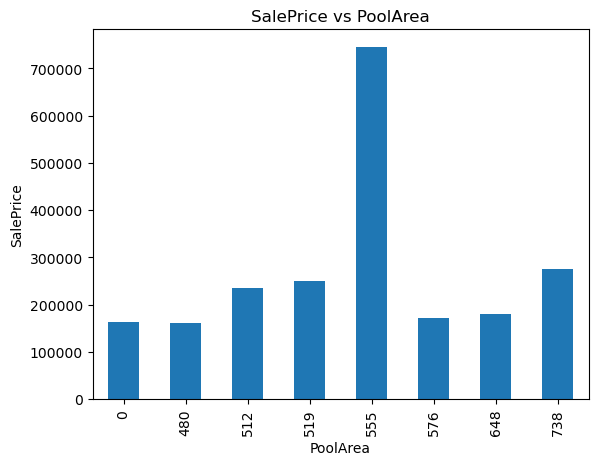

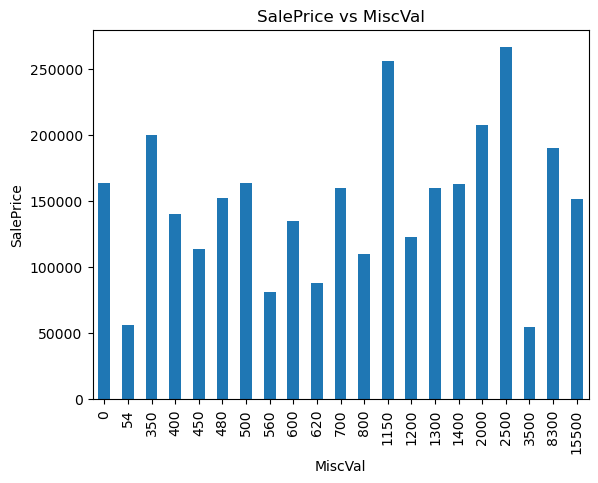

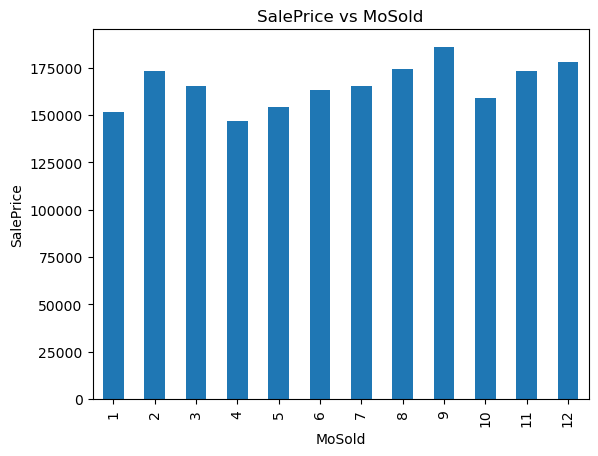

In [178]:
for col in descrete_col:
    dataset = data.copy()

    dataset.groupby(col)['SalePrice'].median().plot.bar()
    plt.xlabel(col)
    plt.ylabel('SalePrice')

    plt.title('SalePrice vs '+col)

    plt.show()



In [182]:
continuous_col = [col for col in data.columns if col not in descrete_col and col not in yearList]

print(continuous_col)
print("length of the continuous columns: ", len(continuous_col))

['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'SalePrice']
length of the continuous columns:  59
